## 0b) Creating the file structure

In [40]:
import os

current_dir = os.path.abspath("")

print(f"{current_dir}")

current_dir_files = os.listdir(current_dir)
print(f"{current_dir_files}")

first_folder = ["experiment_small_data", "experiment_tiny_data"]
second_folder = ["train", "test", "val"]

for a in range(len(first_folder)):
        try:
            os.mkdir(f"{first_folder[a]}")
        except FileExistsError as err:
            print(err)
        for b in range(len(second_folder)):
            try:
                os.mkdir(f"{first_folder[a]}/{second_folder[b]}")
            except FileExistsError as err:
                print(err)

c:\Users\fredr\OneDrive\Documents\GitHub\Deep_Learning_FH\Labb1
['experiment_small_data', 'experiment_tiny_data', 'lab.ipynb', 'originaldata']
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data/train'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data/test'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data/val'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/train'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/test'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/val'


## 0b) Plotting 10 random cat images

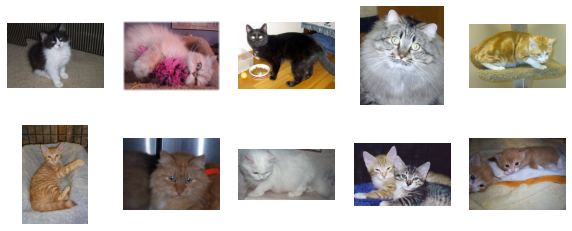

In [41]:
import matplotlib.pyplot as plt
import random as rnd

ten_rand_image = []
for i in range(10):
    r = rnd.randint(1,500)
    ten_rand_image.append(plt.imread(f"./originaldata/train/train/cat.{r}.jpg"))


fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(ten_rand_image[i], cmap = "gray")
    ax.axis("off")


## 0d) Train / Val / Test / Split

In [42]:
import shutil

r = rnd.sample(range(12499), 1250) # This random-list is created without duplicates, so no duplicates of pictures.
train_path = r"./experiment_small_data/train"
test_path = r"./experiment_small_data/test"
val_path = r"./experiment_small_data/val"
for i in range(1250):
        train_cat = f"./originaldata/train/train/cat.{r[i]}.jpg"
        train_dog = f"./originaldata/train/train/dog.{r[i]}.jpg"
        if i <= 800:
                end_path = train_path
        elif i <= 1000:
                end_path = val_path
        else:
                end_path = test_path
        shutil.copy(train_cat, end_path)
        shutil.copy(train_dog, end_path)

## 0e) One-hot-encoding

In [52]:
import numpy as np
temporary_train = np.array(os.listdir("./experiment_small_data/train"))
temporary_test = np.array(os.listdir("./experiment_small_data/test"))
temporary_val = np.array(os.listdir("./experiment_small_data/val"))
train_list = []
test_list = []
val_list = []


temporary_train = np.array(os.listdir("./experiment_small_data/train"))
for i,_ in enumerate(temporary_train):
    if temporary_train[i][0:3] == "dog":
        animal = 1
    elif temporary_train[i][0:3] == "cat":
        animal = 0
    train_list.append([animal, plt.imread(f"./experiment_small_data/train/{temporary_train[i]}")])

'cat.10034.jpg'

[0, array([[[149, 124,  93],
        [136, 111,  80],
        [135, 110,  79],
        ...,
        [213, 208, 108],
        [213, 208, 108],
        [213, 208, 106]],

       [[154, 129,  98],
        [141, 116,  85],
        [140, 115,  84],
        ...,
        [213, 208, 108],
        [213, 208, 108],
        [213, 208, 106]],

       [[160, 135, 104],
        [149, 124,  93],
        [146, 121,  90],
        ...,
        [214, 209, 109],
        [214, 209, 109],
        [214, 209, 107]],

       ...,

       [[103,  67,  55],
        [104,  68,  56],
        [100,  64,  52],
        ...,
        [121,  78,  59],
        [120,  77,  58],
        [120,  77,  58]],

       [[ 93,  57,  45],
        [ 94,  58,  46],
        [ 91,  55,  43],
        ...,
        [120,  77,  58],
        [119,  76,  57],
        [119,  76,  57]],

       [[ 92,  56,  44],
        [ 90,  54,  42],
        [ 89,  53,  41],
        ...,
        [121,  76,  57],
        [122,  77,  58],
        [123,  78,  

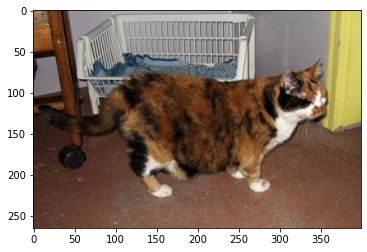

In [62]:
plt.imshow(train_list[55][1])
print(train_list[55])